In [121]:
from PIL import Image
import numpy as np
from numpy import asarray, expand_dims
from os import listdir
from os.path import isdir
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, accuracy_score
import pickle

In [122]:
df = pd.read_csv('faces_train_embeddings.csv',index_col=0)

In [123]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,target
0,-1.647590,-2.050291,2.192740,-0.310849,-0.309029,0.080395,0.863480,1.833071,1.469539,-2.226735,...,-0.453190,1.357549,-0.688587,0.387791,-0.474701,-1.109110,0.298009,-0.699501,0.078977,Dessa
1,-0.861166,-1.164513,1.859924,-1.720223,0.208900,-0.391139,1.063609,2.063228,0.459863,-2.164250,...,-1.101685,1.791857,-0.318591,1.416495,-1.061486,-0.713410,-1.610591,-0.653775,-0.210192,Dessa
2,0.195232,-1.181850,2.093904,-2.218027,-0.438787,-0.280497,-1.047070,2.230372,0.549884,-1.247451,...,-0.885988,1.448878,-0.477330,0.779704,-1.425694,0.066216,-1.969161,-1.082669,0.812740,Dessa
3,-1.604782,-2.422320,1.517443,-1.383071,0.588017,-0.112119,0.626909,2.273672,0.968901,-1.612194,...,-1.473051,1.782758,0.337711,0.581356,-0.447030,-0.064406,-0.662852,-0.813822,-0.058389,Dessa
4,-1.100709,-1.527732,1.620708,-1.118424,-0.075956,-0.231456,1.632379,1.286139,0.501847,-1.417777,...,-0.316608,0.618175,-0.029974,1.216974,-0.384685,-0.779763,-0.021223,-1.605424,-0.730062,Dessa


In [124]:
# X = df - coluna target
X = np.array(df.drop('target', axis=1))
# y = coluna target
y = np.array(df.target)

In [125]:
#Shuffle dataset
from sklearn.utils import shuffle
trainX, trainY = shuffle (X,y, random_state=0)

In [126]:
#hot-encode labels
from sklearn.preprocessing import LabelEncoder

out_encoder = LabelEncoder()
out_encoder.fit(trainY)
trainY = out_encoder.transform(trainY)

In [127]:
#validation
df_val = pd.read_csv('faces_validation_embeddings.csv',index_col=0)
df_val.head(5)

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,target
0,-1.523675,-3.057675,2.235133,-0.341293,0.063947,-0.893874,-0.114136,1.836419,1.097465,-0.637791,...,-1.260578,1.376232,-0.643364,-0.448841,0.396284,-0.904877,-0.035660,-0.535704,0.196821,Dessa
1,-0.495632,-1.320794,2.360189,-0.847709,-0.204602,-0.841331,1.006684,1.754102,1.165373,-0.595010,...,-1.281500,1.451785,-0.256364,0.381176,-1.250163,-1.245942,-0.110298,-0.262677,-0.047439,Dessa
2,-2.179586,-2.875246,1.996602,-0.845462,0.786506,-0.807546,1.108842,1.902001,0.851351,-0.701958,...,-2.290497,1.660553,0.071010,-0.961497,-0.422987,-1.232594,-0.483871,-1.079012,-0.511883,Dessa
3,-0.808715,-1.780204,0.966140,-0.932362,0.719983,0.031120,0.716178,1.465917,1.569647,-0.558551,...,-1.817197,2.587652,0.108394,-0.914538,0.068641,-0.396750,-0.759598,-0.806594,0.179841,Dessa
4,-1.365400,-2.052475,2.176363,-0.699374,0.687984,0.476967,0.725367,1.700635,1.214217,-1.893633,...,-1.067907,1.063823,-0.322278,0.603204,-0.668626,0.130464,0.175355,-0.407748,-0.088077,Dessa


In [128]:
#split X and Y validation
valX = np.array(df_val.drop('target',axis=1))
valY = np.array(df_val.target)

In [129]:
#hot encoder validation Y
out_encoder.fit(valY)
valY = out_encoder.transform(valY)

# Evaluating algorithms

### KNN

In [130]:

from sklearn.neighbors import KNeighborsClassifier

In [131]:
knn = KNeighborsClassifier(n_neighbors=5)

In [132]:
knn.fit(trainX, trainY)

KNeighborsClassifier()

In [133]:
#evaluate the knn model
yhat_train = knn.predict(trainX)
yhat_val = knn.predict(valX)               

In [134]:
#load labels
labels = {}
with open("labels.picle", "rb") as f:
    og_labels = pickle.load(f)
    labels = {v:k for k,v in og_labels.items()}

In [135]:
from sklearn.metrics import confusion_matrix
def print_confusion_matrix(model_name, valY, yhat_val):
    cm = confusion_matrix(valY, yhat_val)
    total = sum(sum(cm))
    acc = (cm[0,0]+cm[1,1]+cm[2,2])/ total
    sensitivity = cm[0,0]/(cm[0,0] + cm[0,1])
    specificity = cm[1,1]/(cm[1,0] + cm[1,1])
    
    print("Modelo: {}".format(model_name))
    print("Acurácia: {:4f}".format(acc))
    print("Sensitividade: {:4f}".format(sensitivity))
    print("Especificidade: {:4f}".format(specificity))
    
    from mlxtend.plotting import plot_confusion_matrix
    fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5,5))
    plt.show()

In [136]:
# Save the trained model as a pickle string.
with open('knn_file','wb') as f:
    pickle.dump(knn, f)

Modelo: KNN
Acurácia: 1.000000
Sensitividade: 1.000000
Especificidade: 1.000000


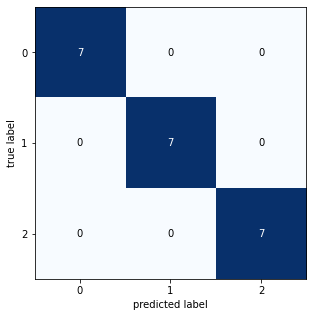

In [137]:
print_confusion_matrix("KNN",valY,yhat_val)

### SVM

In [138]:
from sklearn import svm

svm = svm.SVC()
svm.fit(trainX, trainY)

SVC()

In [139]:
#evaluate the knn model
yhat_train = svm.predict(trainX)
yhat_val = svm.predict(valX)

In [140]:
#save trained model as pickle string
with open('svm_file','wb') as f:
    pickle.dump(knn, f)

Modelo: SVM
Acurácia: 1.000000
Sensitividade: 1.000000
Especificidade: 1.000000


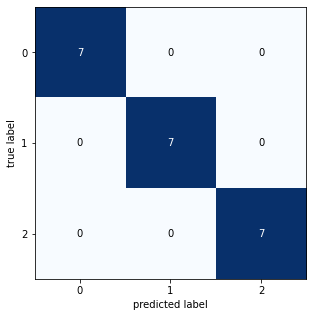

In [141]:
print_confusion_matrix("SVM", valY, yhat_val)

### Multilayer perceptron

In [142]:
from tensorflow.keras.utils import to_categorical

In [143]:
#classe vira uma posicao (class 1, class 2)
trainY = to_categorical(trainY)
valY = to_categorical(valY)

In [144]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [145]:
model = models.Sequential()
model.add(layers.Dense(64,activation="relu",input_shape=(128,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 8,451
Trainable params: 8,451
Non-trainable params: 0
_________________________________________________________________


In [146]:
import tensorflow as tf
model.compile(optimizer="adam",
             loss = "categorical_crossentropy",
             metrics = ['accuracy'])



In [147]:
model.fit(trainX, trainY, epochs=5, batch_size=8)
model.save("test.h5")

Train on 140 samples
Epoch 1/5
140/140 [==============================] - 1s 4ms/sample - loss: 0.8774 - accuracy: 0.6571
Epoch 2/5
140/140 [==============================] - 0s 278us/sample - loss: 0.1453 - accuracy: 0.9643
Epoch 3/5
140/140 [==============================] - 0s 285us/sample - loss: 0.0517 - accuracy: 1.0000
Epoch 4/5
140/140 [==============================] - 0s 271us/sample - loss: 0.0258 - accuracy: 1.0000
Epoch 5/5
140/140 [==============================] - 0s 265us/sample - loss: 0.0324 - accuracy: 1.0000


In [148]:
#evaluate the knn model
yhat_train = model.predict(trainX)
yhat_val = model.predict(valX)

In [149]:
valY = np.argmax(valY, axis=1)
yhat_val = np.argmax(yhat_val, axis=1)

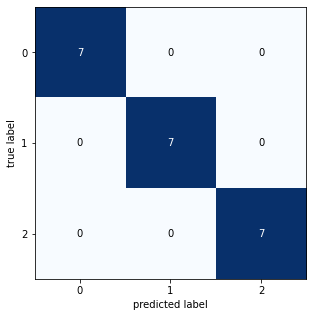

In [150]:
    from mlxtend.plotting import plot_confusion_matrix
    cm = confusion_matrix(valY, yhat_val)
    fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5,5))
    plt.show()